In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()

In [24]:
try:
    # Takes the path of the input folder
    input_path=input("Enter the path of folder\n")
    #changing the path of the folder to input folder
    input_path_files=os.listdir(os.chdir(input_path))
    print(input_path_files)
    #only those files will be considered which are txt files.so we search for txt files and store them.
    files=[docfile for docfile in input_path_files if docfile.endswith('.txt')]
    print(files)
    sentences=[]
    #stopwords are words such as the,a and,etc.Those will be removed
    stop_words=set(stopwords.words('english'))
    for i in files:
        string=""
        #Open the file in read mode.
        file_open=open(i,'r',encoding='cp437',errors="ignore")
        #The matter of the file will be divided into tokens.
        file_tokens=word_tokenize(file_open.read())
        #symbols will be removed as well.
        symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
        for i in symbols:
            file_tokens = np.char.replace(file_tokens, i, '')
        lemmatized_word_tokens=[]
        #tokens now will be lemmatized. Lemmatization means that words will be converted to base words such as
        # running becomes run etc.
        for i in file_tokens:
            lemmatized_word_tokens.append(ps.lemmatize(i))
        # after lemmatizing the words will be joined as string and stored in array
        for j in lemmatized_word_tokens:
            if j not in stop_words:
                string=string+j+" "
        sentences.append(string)
    print(sentences)
    # TF-IDF stands for Term Frequency — Inverse Document Frequency
    # This is performed by looking at how many times a word appears into a document
    Tfidf_vect = TfidfVectorizer()
    vector_matrix = Tfidf_vect.fit_transform(words)
    tokens = Tfidf_vect.get_feature_names()
    # It displays the names of the words
    print(tokens)
    # It displays the frequnecy of the words
    print(vector_matrix.toarray())
    # This function returns the frequency of words respective to that word 
    def create_dataframe(matrix, tokens):
        doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
        df = pd.DataFrame(data=matrix,index=doc_names, columns=tokens)
        return(df)
    print(create_dataframe(vector_matrix.toarray(),tokens))
    # It is used to calculate the frequency of the words from all the text files that are present in the input location
    cosine_similarity_matrix = cosine_similarity(vector_matrix)
    # This function returns the file name and the similarity between other files.
    def create_dataframe1(matrix, tokens):
        df1 = pd.DataFrame(data=matrix,index=tokens, columns=tokens)
        return(df1)
    ans=create_dataframe1(cosine_similarity_matrix,files)
    print(ans)
except Exception as e:
    print(e)

['fatma.txt', 'john.txt', 'juma.txt', 'output.png', 'output2.png', 'plagiarismdetector.ipynb']
['fatma.txt', 'john.txt', 'juma.txt']
['Life best trying find work taking time trying pursue skill ', 'Life finding money spending luxury stuff Coz life kinda short , trust ', 'Life finding money use thing make happy coz life kinda short ']
['best', 'coz', 'find', 'finding', 'happy', 'kinda', 'life', 'luxury', 'make', 'money', 'pursue', 'short', 'skill', 'spending', 'stuff', 'taking', 'thing', 'time', 'trust', 'trying', 'use', 'work']
[[0.29684142 0.         0.29684142 0.         0.         0.
  0.17531933 0.         0.         0.         0.29684142 0.
  0.29684142 0.         0.         0.29684142 0.         0.29684142
  0.         0.59368285 0.         0.29684142]
 [0.         0.26418444 0.         0.26418444 0.         0.26418444
  0.41032556 0.34737079 0.         0.26418444 0.         0.26418444
  0.         0.34737079 0.34737079 0.         0.         0.
  0.34737079 0.         0.         

AxesSubplot(0.125,0.125;0.62x0.755)


[Text(0, 0.5, 'fatma.txt'), Text(0, 1.5, 'john.txt'), Text(0, 2.5, 'juma.txt')]

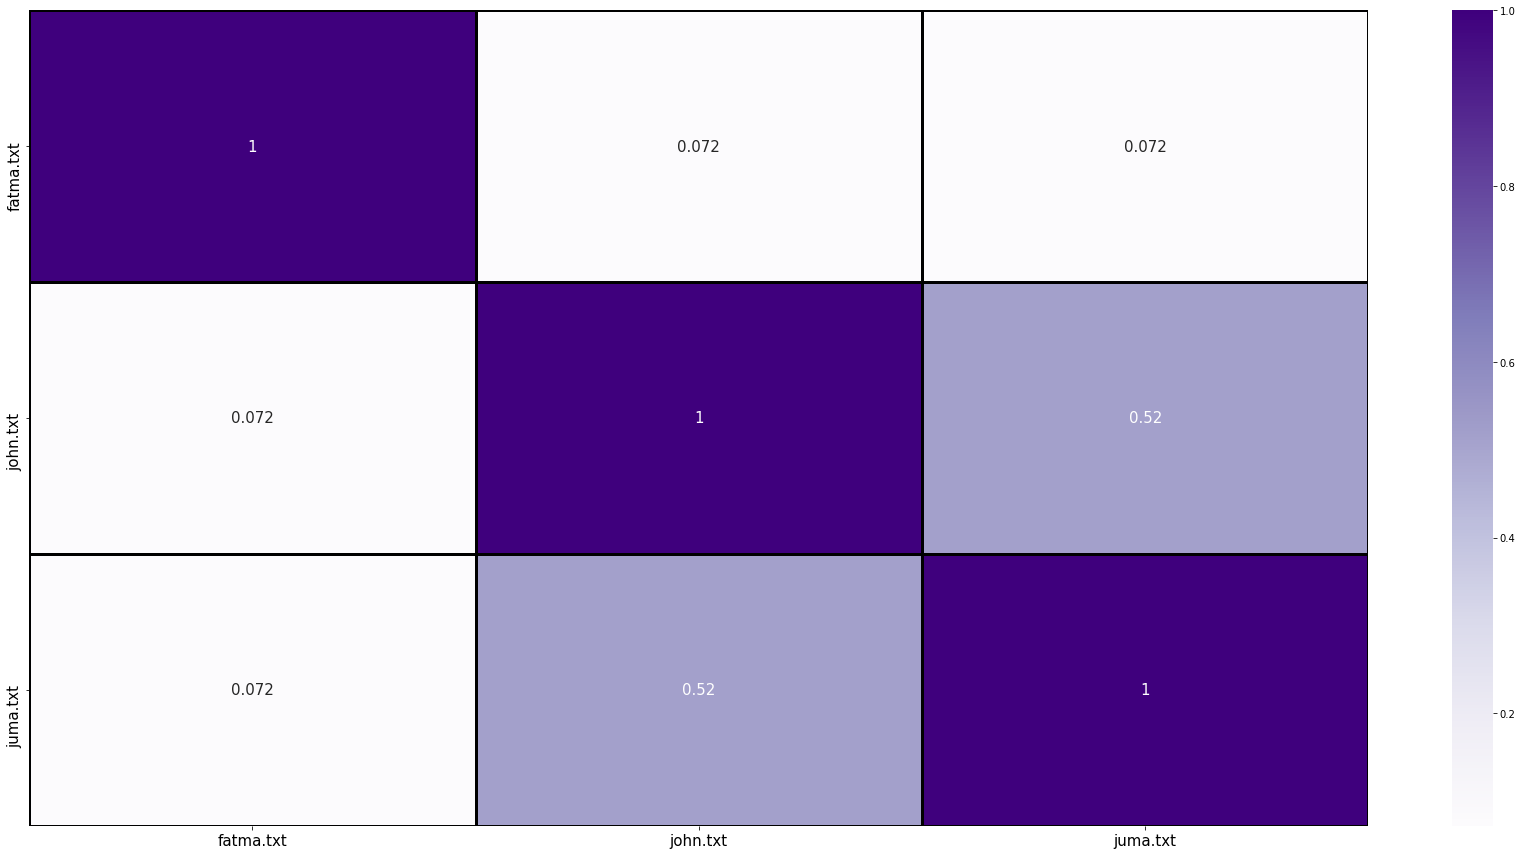

In [25]:
# Now that similarity is represented visually using heatmap.
res=sns.heatmap(ans,linewidths=3,linecolor="black",cmap="Purples",annot=True,annot_kws={'size':15})
plt.gcf().set_size_inches(30, 15)
print(res)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)

